The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

In [ ]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [ ]:
#read data set               logitude=>W,E latitude=>S,N
df=pd.read_csv('/content/archive (45).zip')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [ ]:
#columns
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# information about the total number of rows, the number of non-null values in each column, and the data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
# columns and raw count
print("Raw count: ",df.shape[0])
print("Column count: ",df.shape[1])

Raw count:  20640
Column count:  10


In [ ]:
#data types
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [ ]:
# drop unnececcery columns
df.drop(['housing_median_age'],axis=1,inplace=True)
df

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,1860,409.0,741,349,1.8672,INLAND,84700


Text(0.5, 1.0, 'ocean_proximity graph')

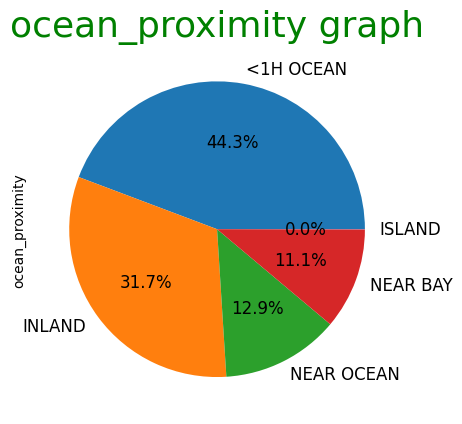

In [ ]:
constaction=df['ocean_proximity'].value_counts()
constaction.plot(kind='pie',fontsize=12,autopct='%1.1f%%')
plt.title('ocean_proximity graph',color='green',fontsize=26)

In [ ]:
# #this steps for missing value replace
a=df['total_bedrooms'].median()
a

435.0

In [ ]:
df['total_bedrooms'].fillna(a,inplace=True)

In [ ]:
df.isna().sum()

longitude             0
latitude              0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64
Axes(0.125,0.11;0.775x0.77)


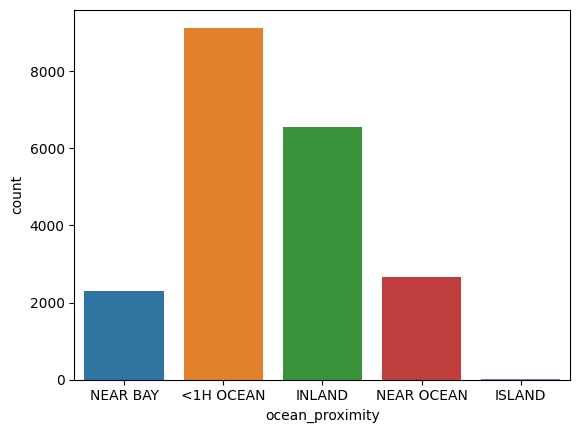

In [ ]:
print(df['ocean_proximity'].value_counts())
print(sns.countplot(x='ocean_proximity',data=df))

In [ ]:
# preprocessing data(cleaning and organising)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['ocean_proximity']=le.fit_transform(df['ocean_proximity'])
df

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,1627,280.0,565,259,3.8462,3,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665,374.0,845,330,1.5603,1,78100
20636,-121.21,39.49,697,150.0,356,114,2.5568,1,77100
20637,-121.22,39.43,2254,485.0,1007,433,1.7000,1,92300
20638,-121.32,39.43,1860,409.0,741,349,1.8672,1,84700


In [ ]:
# This code extracts the feature variables and target variable
# input data/feature varible
x=df.iloc[:,:-1]
x

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,880,129.0,322,126,8.3252,3
1,-122.22,37.86,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,1627,280.0,565,259,3.8462,3
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665,374.0,845,330,1.5603,1
20636,-121.21,39.49,697,150.0,356,114,2.5568,1
20637,-121.22,39.43,2254,485.0,1007,433,1.7000,1
20638,-121.32,39.43,1860,409.0,741,349,1.8672,1


In [ ]:
y=df.iloc[:,-1]
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

In [ ]:
# split the feature variables (x) and target variable (y) into training and testing sets.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5748,-118.27,34.16,5036,1299.0,3164,1175,2.9148,0
5592,-118.26,33.80,2004,481.0,1658,456,3.1779,0
2110,-119.75,36.75,2331,460.0,1290,477,2.5111,1
13901,-116.56,34.06,6928,1529.0,2568,1075,2.5405,1
18425,-121.83,37.26,3609,751.0,1739,682,4.5033,0
...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,1768,474.0,1079,436,1.7823,0
17289,-119.63,34.42,1765,263.0,753,260,8.5608,0
5192,-118.26,33.93,1433,295.0,775,293,1.1326,0
12172,-117.16,33.73,2381,454.0,1323,477,2.6322,1


In [ ]:
x_test

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4712,-118.36,34.06,2810,670.0,1109,624,3.2500,0
2151,-119.78,36.78,2185,455.0,1143,438,1.9784,1
15927,-122.42,37.73,1819,411.0,1534,406,4.0132,3
82,-122.28,37.81,340,97.0,200,87,1.5208,3
8161,-118.13,33.82,1530,290.0,711,283,5.1795,0
...,...,...,...,...,...,...,...,...
11387,-117.98,33.65,1027,206.0,436,180,4.2159,0
2523,-122.14,39.65,419,77.0,190,67,3.6429,1
18897,-122.25,38.12,1339,298.0,794,286,2.5865,3
18878,-122.24,38.07,5451,1194.0,2957,1081,2.6098,3


In [ ]:
y_train

5748     238700
5592     171100
2110      55400
13901     69600
18425    213100
          ...  
10955    205300
17289    500001
5192     104800
12172    140700
235      126000
Name: median_house_value, Length: 14448, dtype: int64

In [ ]:
y_test

4712     355000
2151      70700
15927    229400
82       112500
8161     225400
          ...  
11387    211300
2523      87500
18897    109800
18878    162500
4287     166700
Name: median_house_value, Length: 6192, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([229022.84995129,  91941.78997338, 237885.23542231, ...,
       169564.1969515 , 185059.94730939, 168614.97307918])

In [ ]:
# y_pred=model.predict([[-118.36,	34.06,	2810,	670.0,	1109,	624,	3.2500,	0]])
# y_pred
# # -118.27	34.16	5036	1299.0	3164	1175	2.9148	0

In [ ]:
df1=pd.DataFrame({"Actual_value":y_test,"pedicted_value":y_pred})
df1

,Actual_value,pedicted_value
4712,355000,229022.849951
2151,70700,91941.789973
15927,229400,237885.235422
82,112500,143976.327962
8161,225400,275692.994085
...,...,...
11387,211300,239078.779454
2523,87500,130041.204912
18897,109800,169564.196952
18878,162500,185059.947309


In [ ]:
print("constant values is :",model.intercept_)
print("coefficent :")
list(zip(x,model.coef_))

constant values is : -3993121.767721926
coefficent :


[('longitude', -47816.43396579071),
 ('latitude', -46972.97299764472),
 ('total_rooms', -9.567322030066862),
 ('total_bedrooms', 90.64253284149527),
 ('population', -38.542378190817544),
 ('households', 68.16828354810332),
 ('median_income', 39646.49851147508),
 ('ocean_proximity', 698.8877420141768)]

In [ ]:
# 1. MAE   (mean absolute error)

from sklearn.metrics import mean_absolute_error
print("MAE is :",mean_absolute_error(y_test,y_pred))

MAE is : 51648.3571349443


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print("percentage_error is :",mean_absolute_percentage_error(y_test,y_pred))


percentage_error is : 0.3104602400740431


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is :",mean_squared_error(y_test,y_pred))
ae=mean_squared_error(y_test,y_pred)

MSE is : 5062948464.874183


In [ ]:
print("Root mean squared error :",np.sqrt(ae))

Root mean squared error : 71154.39877389299


In [ ]:
from sklearn.metrics import r2_score
print("r2_score :",r2_score(y_test,y_pred))

r2_score : 0.6148920944557303


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is :",mean_squared_error(y_test,y_pred))
ae=mean_squared_error(y_test,y_pred)

MSE is : 5062948464.874183


In [ ]:
y_pred=model.predict([[-122.23,	37.88	,880	,129.0,	322,	126	,8.3252,	3	]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([403758.63269938])

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,1627,280.0,565,259,3.8462,3,342200
